In [8]:
import os
import extract_msg
import matplotlib.pyplot as plt
from PIL import Image
from trdg.generators import GeneratorFromStrings
import numpy as np
import cv2

def get_msg_file_attachments(msg_directory):
    
    folder = os.listdir(msg_directory)
    files =  [file for file in folder if file.split(".")[-1] == "msg"]
    for file in files:
        msg = extract_msg.Message(os.path.join(".", "123",files[0]))
        for msg in msg.attachments:
            msg.save()

# def preprocess_image(image=None, image_path=None):
    
#     if image_path != None:
#         image = Image.open(image_path)
# #     resized_image = image.resize(tuple(reversed(model_image_size)), Image.BICUBIC)
#     image = image.convert('LA')
#     image_data = np.array(image, dtype='float32')
#     image_data /= 255.
#     image_data = np.expand_dims(image_data, 0)  # Add batch dimension.
#     return image_data

def preprocess_image(image=None, image_path=None):
    
    if image_path != None:
        image = cv2.imread(image_path,0)
        image = filter_noise_from_image(image)
    image_data = np.array(image, dtype='float32')
    image_data /= 255.
    image_data = np.expand_dims(image_data, 0)  # Add batch dimension.
    return image_data

def filter_noise_from_image(image):
#     blur = cv2.GaussianBlur(image,(5,5),0)
#     image = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
#     image = cv2.fastNlMeansDenoising(image, None, 10, 7, 15)
    return image

def plot_image_from_array(img_array, height=None, width=None):
    
    img = Image.fromarray((255 * img_array).astype("uint8")).convert("RGB")
    if height or width == None:
        plt.figure()
    else:
        plt.figure(figsize=(height, width))
    plt.imshow(img)

def generate_data_for_OCR(txt_file, **kwargs):
    
    data = []
    output = []
    with open(txt_file) as sentences:
        for sentence in sentences:
            data.append(sentence.strip("\n"))
    generator = GeneratorFromStrings(data,**kwargs)
    for img, lbl in generator:
        preprocessed_img = preprocess_image(img)
        output.append(preprocessed_img)
    return output


In [9]:
get_msg_file_attachments("./123/")

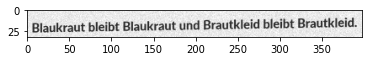

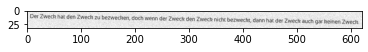

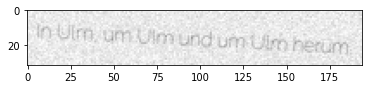

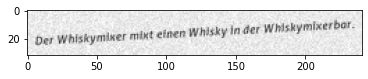

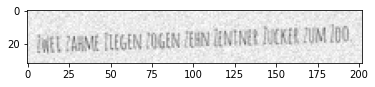

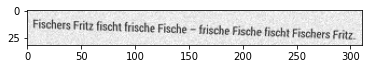

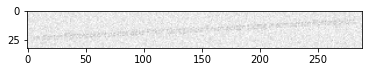

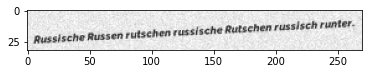

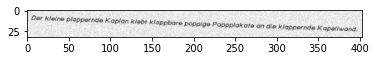

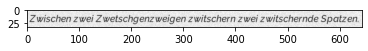

In [4]:
params = {
    "count": 10,
    "size": 32,
    "skewing_angle": 3,
    "random_skew": True,
    "blur": 0,
    "random_blur": False,
    "background_type": 0,
    "distorsion_type": 0,
    "distorsion_orientation": 0,
    "is_handwritten": False,
    "width": -1,
    "alignment": 1,
    "text_color": "#282828",
    "orientation": 0,
    "space_width": 1.0,
    "character_spacing": 0,
    "margins": (5, 5, 5, 5),
    "fit": False,
    "output_mask": False,
    "word_split": False,
    "image_dir": "ocr_data",
    "stroke_width": 0, 
    "stroke_fill": "#282828",
}

ocr_data = generate_data_for_OCR("ocr_data.txt", **params)
for ocr_image in ocr_data:
    
    plot_image_from_array(ocr_image[0,:,:,0])

Best angle: 1.5


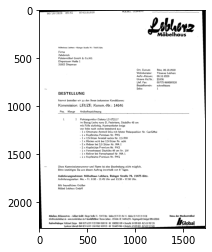

In [5]:
from scipy.ndimage import interpolation as inter


def find_score(arr, angle):
    data = inter.rotate(arr, angle, reshape=False, order=0)
    hist = np.sum(data, axis=1)
    score = np.sum((hist[1:] - hist[:-1]) ** 2)
    return hist, score

def correct_image_skew(image):
    
    delta = 0.5
    limit = 5
    angles = np.arange(-limit, limit+delta, delta)
    scores = []
    for angle in angles:
        hist, score = find_score(image, angle)
        scores.append(score)
    best_score = max(scores)
    best_angle = angles[scores.index(best_score)]
    print('Best angle: {}'.format(best_angle))
    # correct skew
    data = inter.rotate(image, best_angle, reshape=False, order=0)
    plot_image_from_array(data, 10, 10)
    img = Image.fromarray((255 * data).astype("uint8")).convert("RGB")
    img.save('skew_corrected.png')
    
    return data
    

filename = "Fax_Seite_1.png"
image_data =  preprocess_image(image_path=filename)
corrected_image = correct_image_skew(image_data[0,:,:])


In [ ]:
for ocr_image in ocr_data:
#     correct_image_skew(ocr_image[0,:,:,0])
    a, b = filter_noise_from_image(ocr_image[0,:,:,0])

In [33]:
filename = "image001.png"
image, image_data =  preprocess_image(filename)
img = (image_data[0,:,:,0]*255).astype("uint8")
print(img.shape)
img = Image.fromarray(img).convert("RGB")
img.save("test.png")
plt.figure(figsize=(15,15))


(1364, 1024)


<Figure size 1080x1080 with 0 Axes>

In [ ]:
filter_noise_from_image()